# Abstract :

This is dataset that describe Portugal bank marketing campaigns results. Conducted campaigns were based mostly on direct phone calls, offering bank's clients to place a term deposit. If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'.

## Task:
A.predicting the future results of marketing companies based on available statistics and, accordingly, formulating recommendations for such companies in the future.
B.building a profile of a consumer of banking services (deposits

### Data Definition:

Input variables:

1) **age**: (numeric)


2) **job**: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')


3) **marital**:  marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4) **education**: education of individual (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","u nknown")


5) **default**: has credit in default? (categorical: "no","yes","unknown")


6) **housing**: has housing loan? (categorical: "no","yes","unknown")


7) **loan**: has personal loan? (categorical: "no","yes","unknown")


**Related with the last contact of the current campaign**:


8) **contact**: contact communication type (categorical: "cellular","telephone")


9) **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")



10) **dayofweek**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")


11) **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


**Other attributes**:

12) **campaign**: number of contacts performed during this campaign and for this client (numeric,
includes last contact)


13) **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)



14) **previous**: number of contacts performed before this campaign and for this client (numeric)



15) **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")



**Social and economic context attributes**


16) **emp.var.rate**: employment variation rate - quarterly indicator (numeric)


17) **cons.price.idx**: consumer price index - monthly indicator (numeric)


18) **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)


19) **concavepoints_se**: standard error for number of concave portions of the contour


20) **euribor3m**: euribor 3 month rate - daily indicator (numeric)



21) **nr.employed**: number of employees - quarterly indicator (numeric)



**Output variable (desired target)**:


22) **y**: has the client subscribed a term deposit? (binary: "yes","no")




# Import Packages

**Importing the necessary libraries**

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

# Read Data

In [4]:
data = pd.read_csv('../Dataset/Bank.csv',delimiter=";")

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Analayzing the data

In [6]:
data.shape

(41188, 21)

# understanding the dataset

In [7]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [10]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [11]:
cat_col=[col for col in data.columns.values if data[col].dtype=='object']
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [12]:
df_cat=data[cat_col]
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [13]:
for x in cat_col:
    print("\t",x)
    print(df_cat[x].value_counts())
    print("\n","*"*50)

	 job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

 **************************************************
	 marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

 **************************************************
	 education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

 **************************************************
	 default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

 **************************************************
	 housing

In [14]:
df_cat["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

							 job


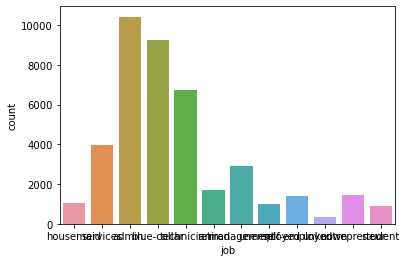


 ******************************************************************************************************************************************************
							 marital


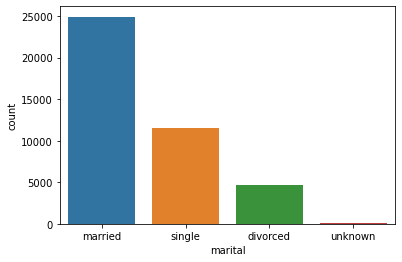


 ******************************************************************************************************************************************************
							 education


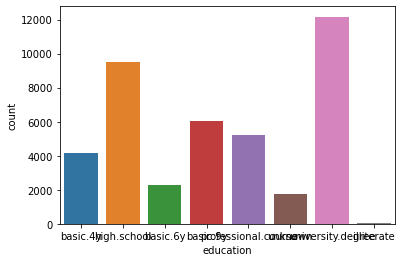


 ******************************************************************************************************************************************************
							 default


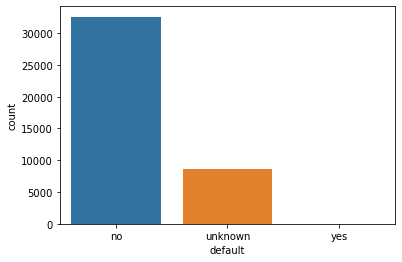


 ******************************************************************************************************************************************************
							 housing


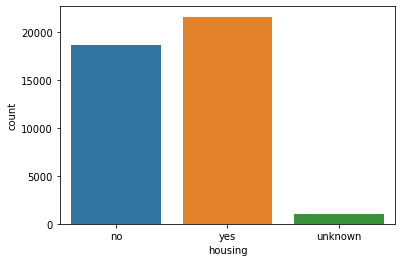


 ******************************************************************************************************************************************************
							 loan


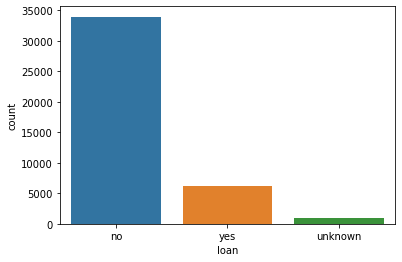


 ******************************************************************************************************************************************************
							 contact


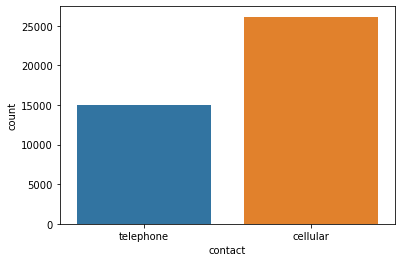


 ******************************************************************************************************************************************************
							 month


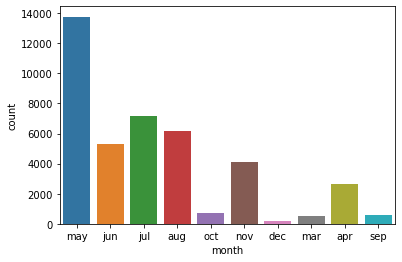


 ******************************************************************************************************************************************************
							 day_of_week


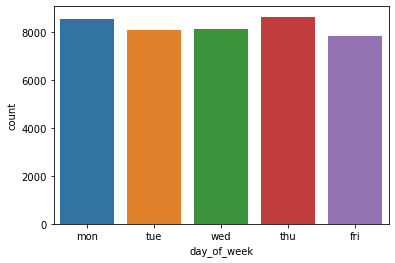


 ******************************************************************************************************************************************************
							 poutcome


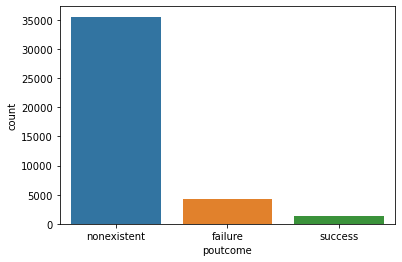


 ******************************************************************************************************************************************************
							 y


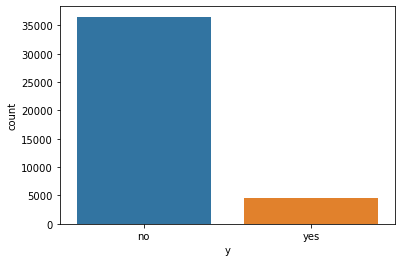


 ******************************************************************************************************************************************************


In [15]:
for x in cat_col:
    print("\t"*7,x)
    sns.countplot(df_cat[x])
    plt.show()
    print("\n","*"*150)

In [16]:
from pandas.api.types import is_string_dtype  
# from pandas library we are using is_string_dtype function

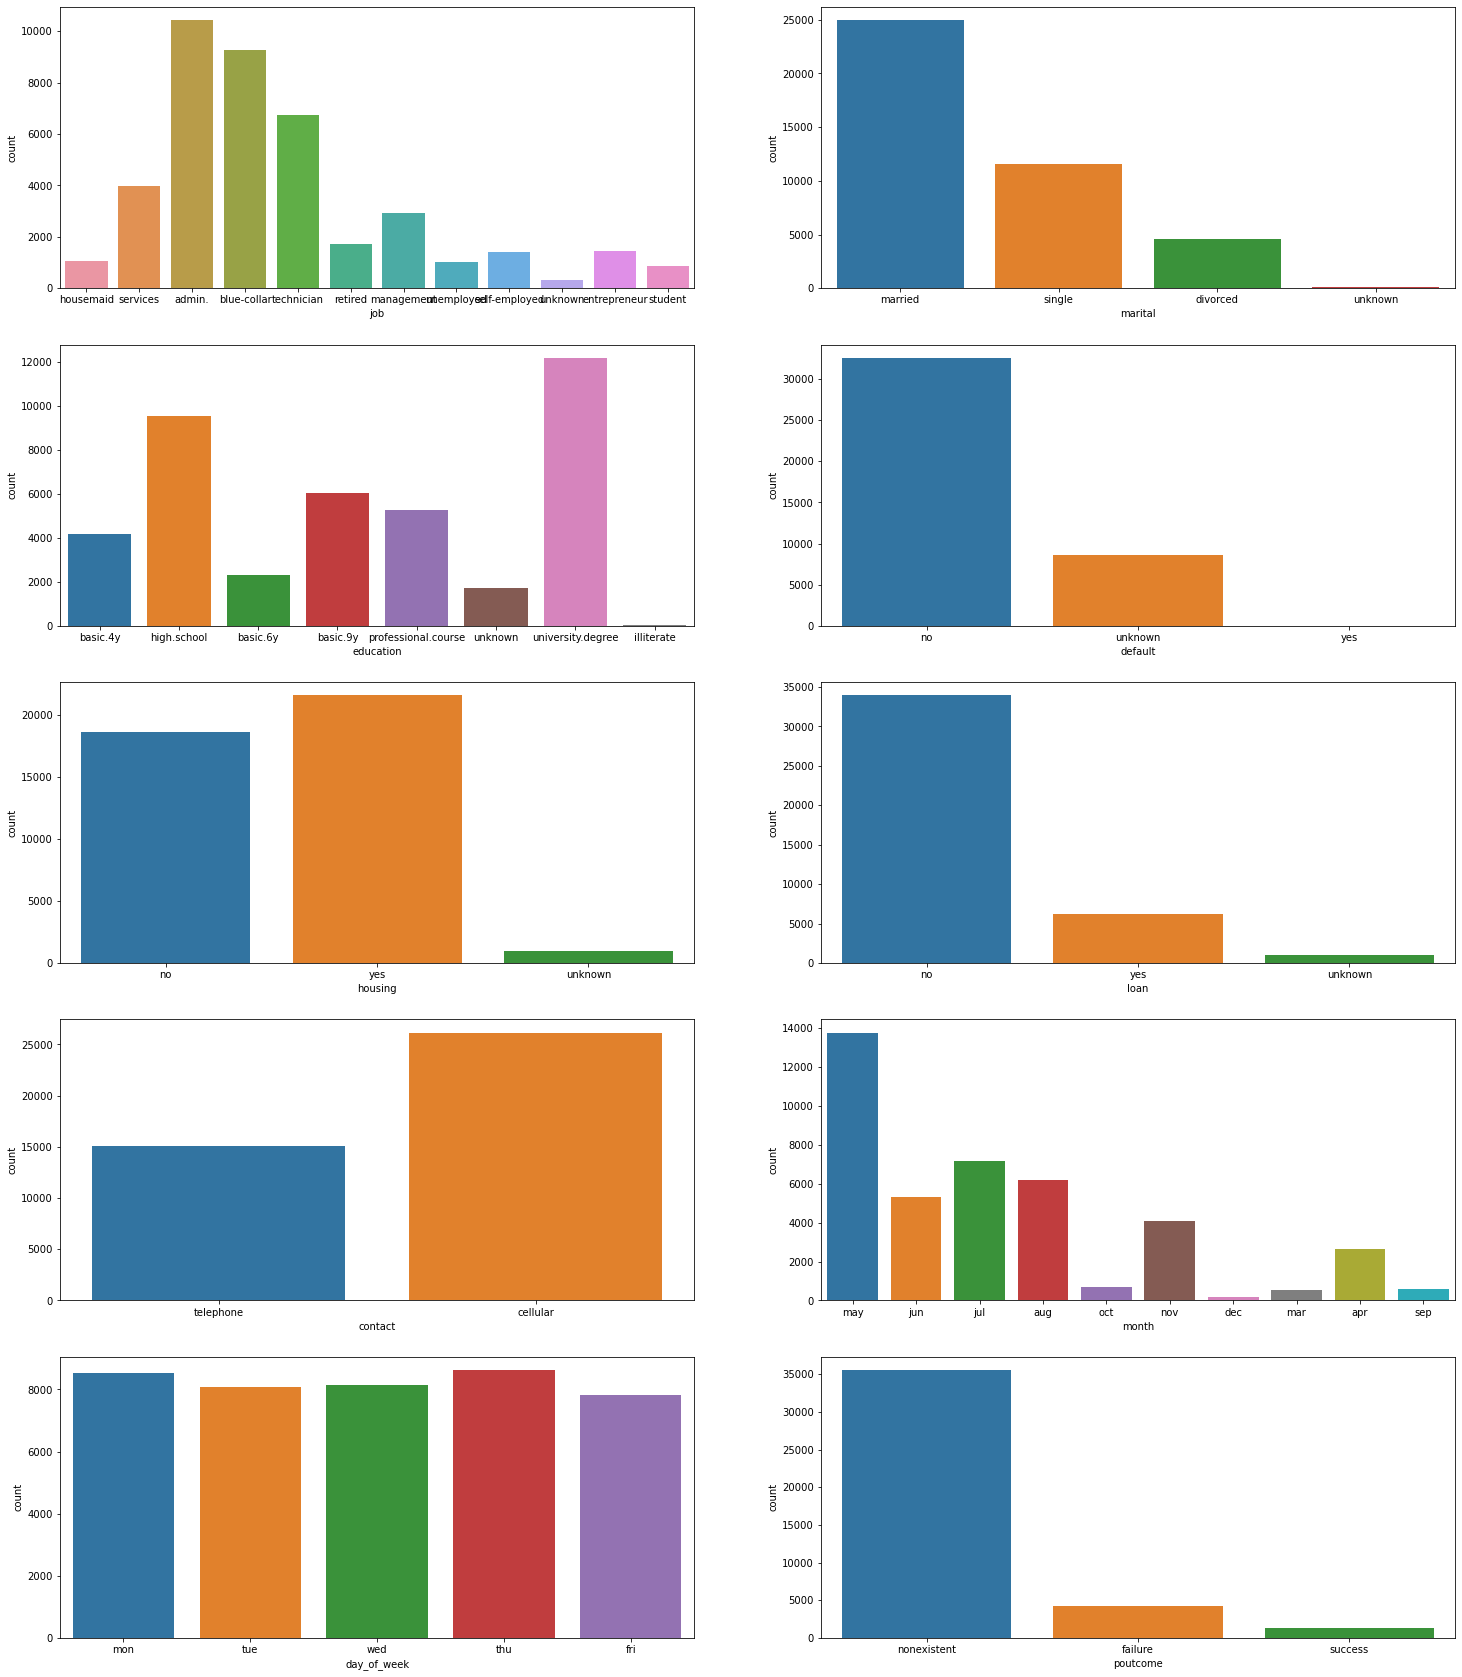

In [17]:

categorical=[]   #creating an empty list categorical and if the data type is categorical we are appending it into the list using for loop#

for column in data: 
    if is_string_dtype(data[column]):
        categorical.append(column)

# we are plotting a count plot of the categorical variables
fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize=(25, 30))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax = subplot)
plt.show()

**we have plotted count plot for different categorical variables there are 10 varibles that are job marital object education object default object housing object loan object contact object month object day_of_week object y object we can conclude these things from the graph that most bank clients are from admin,bluecollar and technician. Mostly are married. Almost clients have university degree Most term deposit is in may month and and in all days of week Most clients dont have loan on them There are data of mixed clients who uses telephone as well as cellular for contact**

 # Lets plot countplot of target variable y i.e term deposit

In [18]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

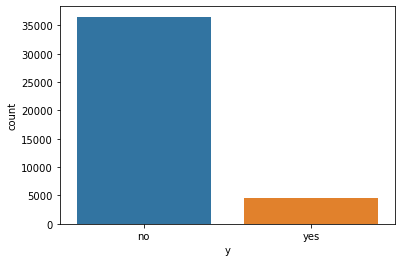

In [19]:
sns.countplot(data.y)

**Majority dont want a term deposit**

# Missing value analysis

In [20]:
missing_val=data.isnull().sum()
missing_val

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

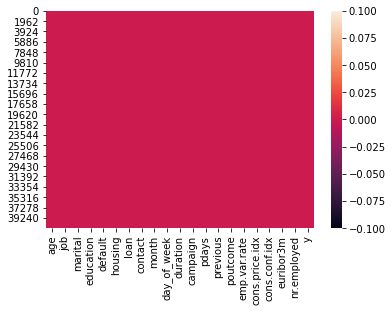

In [21]:
sns.heatmap(data.isnull())

**we can see that there are no missing values**

**Here i am not doing label encoding because i think i cannot give order to any categorical variable**

# Making a  another dataframe for categorical variables

In [22]:
df_cat=data[categorical]

In [23]:
df_cat['target']=np.where(data['y']=='yes',1,0)

In [24]:
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y', 'target'],
      dtype='object')

In [25]:
df_cat.drop(['y'], axis=1,inplace=True)  

In [26]:
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'target'],
      dtype='object')

In [27]:
df_num=data.drop(categorical,axis=1)

In [28]:
df_target=df_cat.target
df_target

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: target, Length: 41188, dtype: int64

In [29]:
df_cat.drop(['target'], axis=1,inplace=True) 


In [30]:
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [31]:
df_cat_dummy=pd.get_dummies(df_cat,drop_first = True)
df_cat_dummy

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41184,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41185,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [32]:
df_cat_dummy.shape

(41188, 43)

In [33]:
df_final=pd.concat([df_cat_dummy,df_num],axis=1)
df_final

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,1,0,0,0,0,0,0,0,...,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,0,0,0,0,0,0,1,0,0,0,...,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,0,0,0,0,0,0,1,0,0,0,...,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,0,0,0,0,0,0,0,0,0,0,...,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,0,0,0,0,0,0,1,0,0,0,...,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,1,0,0,0,0,0,0,0,0,0,...,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,0,0,0,0,1,0,0,0,0,0,...,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,0,0,0,0,0,0,0,0,1,0,...,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


**standardise the data**

In [34]:
df_finalized = df_final.apply(lambda rec: (rec - rec.mean()) / rec.std())
df_finalized

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.538310,-0.191428,6.152697,-0.276432,-0.208755,-0.18903,-0.326552,-0.147325,-0.442444,-0.15887,...,1.533016,0.010471,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676
1,-0.538310,-0.191428,-0.162526,-0.276432,-0.208755,-0.18903,3.062221,-0.147325,-0.442444,-0.15887,...,1.628973,-0.421495,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676
2,-0.538310,-0.191428,-0.162526,-0.276432,-0.208755,-0.18903,3.062221,-0.147325,-0.442444,-0.15887,...,-0.290182,-0.124518,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676
3,-0.538310,-0.191428,-0.162526,-0.276432,-0.208755,-0.18903,-0.326552,-0.147325,-0.442444,-0.15887,...,-0.002309,-0.413782,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676
4,-0.538310,-0.191428,-0.162526,-0.276432,-0.208755,-0.18903,3.062221,-0.147325,-0.442444,-0.15887,...,1.533016,0.187886,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,-0.538310,-0.191428,-0.162526,-0.276432,4.790194,-0.18903,-0.326552,-0.147325,-0.442444,-0.15887,...,3.164298,0.292021,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662
41184,1.857619,-0.191428,-0.162526,-0.276432,-0.208755,-0.18903,-0.326552,-0.147325,-0.442444,-0.15887,...,0.573438,0.481006,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662
41185,-0.538310,-0.191428,-0.162526,-0.276432,4.790194,-0.18903,-0.326552,-0.147325,-0.442444,-0.15887,...,1.533016,-0.267222,-0.204906,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662
41186,-0.538310,-0.191428,-0.162526,-0.276432,-0.208755,-0.18903,-0.326552,-0.147325,2.260119,-0.15887,...,0.381522,0.708560,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662


In [35]:
df_target

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: target, Length: 41188, dtype: int64

# splitting the data into training and testing

In [36]:
# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(df_finalized, df_target, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)


num_trees = 200

model_rf = RandomForestClassifier(n_estimators=num_trees,
                                  max_depth=5,
                                  min_samples_split = 0.01,
                                  max_features = 'log2',
                                  random_state = 0,
                                  class_weight='balanced',
                                  verbose = 1)
model_rf.fit(X_train, y_train)



y_train_pred = model_rf.predict_proba(X_train)[:,1]
y_valid_pred = model_rf.predict_proba(X_test)[:,1]


print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_valid_pred)))
var_columns=X_train.columns
feature_imp=pd.DataFrame({"Variable_Name":var_columns,
              "Importance":model_rf.feature_importances_}) \
            .sort_values('Importance', ascending=False)

The shape of X_train is: (28831, 53)
The shape of X_test is: (12357, 53)
The shape of y_train is: (28831,)
The shape of y_test is: (12357,)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AUC Train: 0.9178
AUC Valid: 0.9177


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


## random forest

In [37]:
feature_imp

,Variable_Name,Importance
44,duration,0.270583
52,nr.employed,0.154984
51,euribor3m,0.139428
48,emp.var.rate,0.102366
50,cons.conf.idx,0.058982
46,pdays,0.047986
42,poutcome_success,0.041473
49,cons.price.idx,0.035038
27,contact_telephone,0.027261
47,previous,0.018645


## Logistic Regression

In [38]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(df_finalized, df_target, test_size = 0.40, random_state = 1)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (24712, 53)
y_train (24712,)
X_test (16476, 53)
y_test (16476,)


In [39]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

In [40]:
# create a generalized function to calculate the metrics values for test set
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))

In [41]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

#### Define a function to plot the ROC curve.

In [51]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for Target Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

#### Create a generalized function to create a dataframe containing the scores for the models.

In [43]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

In [44]:
# instantiate the 'SGDClassifier' to build model using SGD
# to perform logistic regression, consider the log-loss function 
# set 'random_state' to generate the same dataset each time you run the code 
SGD = SGDClassifier(loss = 'log', random_state = 10)

# fit the model on scaled training data
logreg_with_SGD = SGD.fit(X_train, y_train)

In [45]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = logreg_with_SGD.predict_proba(X_test)[:,1]

In [46]:
# use predict() to predict the class labels of target variable
y_pred = logreg_with_SGD.predict(X_test)

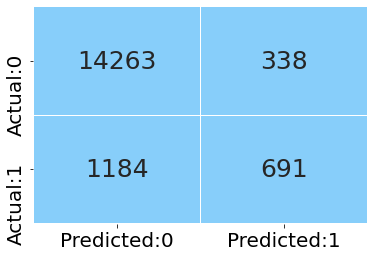

In [47]:
# call the function to plot the confusion matrix
# pass the logistic regression (SGD) model to the function
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap


plot_confusion_matrix(logreg_with_SGD)

In [48]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the logstic regression (SGD) model to the function
test_report = get_test_report(logreg_with_SGD)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     14601
           1       0.67      0.37      0.48      1875

    accuracy                           0.91     16476
   macro avg       0.80      0.67      0.71     16476
weighted avg       0.89      0.91      0.90     16476



In [49]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression (SGD) model to the function
from sklearn.metrics import cohen_kappa_score
kappa_value = kappa_score(logreg_with_SGD)

# print the kappa value
print(kappa_value)

0.42991892661274145


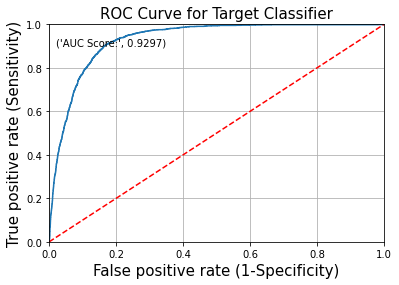

In [52]:
# call the function 'plot_roc' to plot the ROC curve
# pass the logstic regression (SGD) model to the function
plot_roc(logreg_with_SGD)

In [119]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression' as model name to the function
update_score_card(model_name = 'Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.929747,0.671526,0.368533,0.907623,0.429919,0.475895


## SVM

In [53]:
# build the model
svclassifier = SVC(kernel = 'linear')

# fit the model
svclassifier.fit(X_train, y_train)



SVC(kernel='linear')

In [54]:
# predict the values
y_pred = svclassifier.predict(X_test)

In [56]:
SVM_1 = classification_report(y_test,y_pred)

# print the result
print(SVM_1)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     14601
           1       0.65      0.31      0.42      1875

    accuracy                           0.90     16476
   macro avg       0.78      0.65      0.68     16476
weighted avg       0.89      0.90      0.89     16476



## Adaboost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

# build the model
adaboost = AdaBoostClassifier(random_state=10)
# fit the model
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=10)

In [58]:
# predict the values
y_pred_adaboost  = adaboost.predict(X_test)

In [59]:
# accuracy measures by classification_report()
AdaBoost = classification_report(y_test, y_pred_adaboost)

# print the result
print(AdaBoost)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14601
           1       0.67      0.41      0.51      1875

    accuracy                           0.91     16476
   macro avg       0.80      0.69      0.73     16476
weighted avg       0.90      0.91      0.90     16476



## KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

In [62]:
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

In [63]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the knn model to the function
KNN = get_test_report(knn_model)

# print the performace measures
print(KNN)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14601
           1       0.55      0.34      0.42      1875

    accuracy                           0.89     16476
   macro avg       0.73      0.65      0.68     16476
weighted avg       0.88      0.89      0.88     16476



In [64]:
update_score_card(model_name = 'KNN')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,KNN,0.929747,0.650055,0.313067,0.902646,0.376476,0.422606


In [135]:
update_score_card(model_name = 'Adaboost')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.929747,0.671526,0.368533,0.907623,0.429919,0.475895
1,KNN,0.929747,0.650055,0.313067,0.902646,0.376476,0.422606
2,KNN,0.929747,0.650055,0.313067,0.902646,0.376476,0.422606
3,Adaboost,0.929747,0.650055,0.313067,0.902646,0.376476,0.422606


In [136]:
update_score_card(model_name = 'SVM')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.929747,0.671526,0.368533,0.907623,0.429919,0.475895
1,KNN,0.929747,0.650055,0.313067,0.902646,0.376476,0.422606
2,KNN,0.929747,0.650055,0.313067,0.902646,0.376476,0.422606
3,Adaboost,0.929747,0.650055,0.313067,0.902646,0.376476,0.422606
4,SVM,0.929747,0.650055,0.313067,0.902646,0.376476,0.422606


#  Conclusion and Interpretation

In [144]:
# print the 'score_card' to compare all the models
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.929747,0.671526,0.368533,0.907623,0.429919,0.475895
1,KNN,0.929747,0.650055,0.313067,0.902646,0.376476,0.422606
2,KNN,0.929747,0.650055,0.313067,0.902646,0.376476,0.422606
3,Adaboost,0.929747,0.650055,0.313067,0.902646,0.376476,0.422606
4,SVM,0.929747,0.650055,0.313067,0.902646,0.376476,0.422606


** As we can see that Logistic Regression having a better Accuracy Score then all of the model. we will consider Logistic regression model.**

